In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Cargar dataset
dataset = pd.read_csv('peso_altura.csv')
pd.read_csv('peso_altura.csv')

In [5]:
# Definir variables (X = Sexo y Peso, y = Altura)
X = dataset.iloc[:, :-1].values  # "Sexo" y "Peso"
y = dataset.iloc[:, -1].values   # "Altura"

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [6]:
# Aplicar LabelEncoder SOLO a la columna "Sexo"
labelencoder = LabelEncoder()
X_train[:, 0] = labelencoder.fit_transform(X_train[:, 0])  # Convertir "Sexo" en valores numéricos
X_test[:, 0] = labelencoder.transform(X_test[:, 0])  # Transformar los datos de prueba sin volver a entrenar

In [ ]:
# Convertir X_train y X_test a tipo float (LabelEncoder devuelve enteros)
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Entrenar el modelo de Regresión Lineal
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
# Mostrar coeficientes
print("b0 (Intercepto):", regressor.intercept_)
print("b1 (Coeficientes):", regressor.coef_)

# Predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test)

In [ ]:
# Predicción con nuevos valores
peso_1 = 90  # Peso en kg
sexo_1 = 1   # Mujer
peso_2 = 53  # Peso en kg
sexo_2 = 0   # Hombre
predicciones = regressor.predict([[sexo_1, peso_1], [sexo_2, peso_2]])
print("Predicción para persona 1:", predicciones[0])
print("Predicción para persona 2:", predicciones[1])

# Visualización: Relación Peso vs Altura
plt.scatter(X_train[:, 1], y_train, color='red', label="Datos reales")
plt.plot(X_train[:, 1], regressor.predict(X_train), color='blue', label="Línea de regresión")
plt.title('Altura vs Peso (Datos de Entrenamiento)')
plt.xlabel('Peso (kg)')
plt.ylabel('Altura (cm)')
plt.legend()
plt.show()

Aqui vamos a Trabajar con el Dataset  de BMI - Body Mass Index que va tener dos archivos csv que serian los seguientes dos:

bmi_train.csv

bmi_validadtion.csv


Aqui estaria el primero de bmi_train.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Cargar dataset
train_dataset = pd.read_csv('bmi_train.csv')

# Definir variables (X = Sexo, Altura y Peso, y = Índice)
X = train_dataset.iloc[:, :-1].values  # "Sexo", "Altura" y "Peso"
y = train_dataset.iloc[:, -1].values   # "Índice"

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Aplicar LabelEncoder SOLO a la columna "Sexo"
labelencoder = LabelEncoder()
X_train[:, 0] = labelencoder.fit_transform(X_train[:, 0])  # Convertir "Sexo" en valores numéricos
X_test[:, 0] = labelencoder.transform(X_test[:, 0])  # Transformar los datos de prueba sin volver a entrenar

# Convertir X_train y X_test a tipo float (LabelEncoder devuelve enteros)
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Entrenar el modelo de Regresión Lineal
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Mostrar coeficientes
print("b0 (Intercepto):", regressor.intercept_)
print("b1 (Coeficientes):", regressor.coef_)

# Predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test)

# Predicción con nuevos valores
altura_1 = 170  # Altura en cm
peso_1 = 90     # Peso en kg
sexo_1 = 1      # Mujer
altura_2 = 160  # Altura en cm
peso_2 = 53     # Peso en kg
sexo_2 = 0      # Hombre
predicciones = regressor.predict([[sexo_1, altura_1, peso_1], [sexo_2, altura_2, peso_2]])
print("Predicción para persona 1:", predicciones[0])
print("Predicción para persona 2:", predicciones[1])

# Visualización: Relación Peso vs Índice
plt.scatter(X_train[:, 2], y_train, color='red', label="Datos reales")
plt.plot(X_train[:, 2], regressor.predict(X_train), color='blue', label="Línea de regresión")
plt.title('Índice vs Peso (Datos de Entrenamiento)')
plt.xlabel('Peso (kg)')
plt.ylabel('Índice')
plt.legend()
plt.show()

Aqui estaria el segundo de bmi_validation.csv

b0 (Intercepto): 77.16155081453113
b1 (Coeficientes): [ 1.97114979 -0.4646552   0.36756495]
Predicción para persona 1: 33.22216273119407
Predicción para persona 2: 22.297661711257234


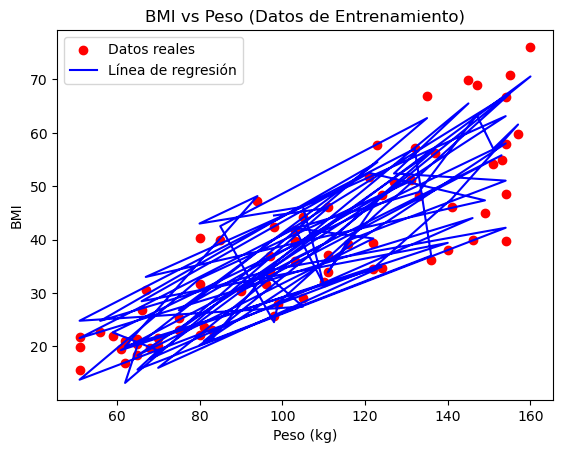

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Cargar dataset
validation_dataset = pd.read_csv('bmi_validation.csv')

# Calcular BMI como variable objetivo
validation_dataset["BMI"] = validation_dataset["Weight"] / ((validation_dataset["Height"] / 100) ** 2)

# Definir variables (X = Sexo, Altura y Peso, y = BMI)
X = validation_dataset.iloc[:, :-1].values  # "Gender", "Height", "Weight"
y = validation_dataset.iloc[:, -1].values   # "BMI"

# Aplicar LabelEncoder SOLO a la columna "Gender"
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])  # Convertir "Gender" en valores numéricos

# Convertir X a tipo float (LabelEncoder devuelve enteros)
X = X.astype(float)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Entrenar el modelo de Regresión Lineal
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Mostrar coeficientes
print("b0 (Intercepto):", regressor.intercept_)
print("b1 (Coeficientes):", regressor.coef_)

# Predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test)

# Predicción con nuevos valores
altura_1 = 170  # Altura en cm
peso_1 = 90     # Peso en kg
sexo_1 = 1      # Mujer
altura_2 = 160  # Altura en cm
peso_2 = 53     # Peso en kg
sexo_2 = 0      # Hombre
predicciones = regressor.predict([[sexo_1, altura_1, peso_1], [sexo_2, altura_2, peso_2]])

print("Predicción para persona 1:", predicciones[0])
print("Predicción para persona 2:", predicciones[1])

# Visualización: Relación Peso vs BMI
plt.scatter(X_train[:, 2], y_train, color='red', label="Datos reales")
plt.plot(X_train[:, 2], regressor.predict(X_train), color='blue', label="Línea de regresión")
plt.title('BMI vs Peso (Datos de Entrenamiento)')
plt.xlabel('Peso (kg)')
plt.ylabel('BMI')
plt.legend()
plt.show()
